# Clustering and Sentiment Analysis
Notebook ini memuat langkah-langkah untuk melakukan klasterisasi data dan analisis sentimen menggunakan IndoBERT.

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from transformers import pipeline

In [37]:
# Load dataset
csv_path = 'https://raw.githubusercontent.com/EvansKizito/SAMPLING-DAN-RANCANGAN-SURVEY/refs/heads/evans/prepared.csv'
df = pd.read_csv(csv_path)

In [38]:
# Pilih kolom likert (5 sampai 49)
likert_cols = df.columns[5:50]
X = df[likert_cols].apply(pd.to_numeric, errors='coerce').fillna(0)

In [39]:
# Standarisasi dan klasterisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

In [40]:
# Analisis sentimen menggunakan IndoBERT
text_col = df.columns[50]
sentiment_pipeline = pipeline(
    'sentiment-analysis',
    model='w11wo/indonesian-roberta-base-sentiment-classifier',
)
label_to_score = {'positive': 1.0, 'neutral': 0.0, 'negative': -1.0}

def get_polarity(text: str) -> float:
    if pd.isna(text) or not str(text).strip():
        return 0.0
    result = sentiment_pipeline(str(text))[0]
    label = result.get('label', 'neutral').lower()
    score = result.get('score', 0.0)
    return score * label_to_score.get(label, 0.0)

df['sentiment'] = df[text_col].apply(get_polarity)

Device set to use cpu


In [19]:
print(df)

              Timestamp                  Nama Lengkap         NPM  \
0   2025-05-30 14:54:12          Dhiya Harnum Pratiwi  2306164481   
1   2025-05-30 15:17:27             Meiliana Putricia  2306164512   
2   2025-05-30 19:23:29        Natasya Revalina Putri  2306164411   
3   2025-05-30 19:45:40                      Angelyne  2306209624   
4   2025-05-30 20:04:46                Nashwa Nadilah  2306263020   
..                  ...                           ...         ...   
92  2025-06-05 20:57:29          Adelia Renata Frisco  2406484164   
93  2025-06-05 21:24:41        Harnindyta Khairunnisa  2306261280   
94  2025-06-05 21:27:53  Florentina Sephina Situmeang  2306231832   
95  2025-06-05 23:24:26          Najwa Fatimatul Zara  2306153963   
96  2025-06-06 15:13:17            Kelvin Rich Zainal  2306164891   

    Program Studi  Angkatan  \
0      Statistika      2023   
1      Statistika      2023   
2      Statistika      2023   
3      Statistika      2023   
4   Ilmu Aktuari

In [41]:
# Ringkasan hasil
cluster_counts = df['cluster'].value_counts().sort_index()
print('Cluster counts:')
print(cluster_counts)

print('Sentiment polarity summary:')
print(df['sentiment'].describe())

Cluster counts:
cluster
0    25
1    37
2    35
Name: count, dtype: int64
Sentiment polarity summary:
count    97.000000
mean     -0.217928
std       0.821635
min      -0.999143
25%      -0.935817
50%      -0.777101
75%       0.778510
max       0.999298
Name: sentiment, dtype: float64


In [42]:
# Karakteristik setiap cluster
cluster_characteristics = df.groupby('cluster')[likert_cols].mean()
print('\nKarakteristik rata-rata Likert per Cluster:')
print(cluster_characteristics)

# Karakteristik sentimen per cluster
sentiment_per_cluster = df.groupby('cluster')['sentiment'].mean()
print('\nRata-rata Sentimen per Cluster:')
print(sentiment_per_cluster)

# Deskripsi statistik sentimen per cluster
sentiment_description_per_cluster = df.groupby('cluster')['sentiment'].describe()
print('\nDeskripsi Statistik Sentimen per Cluster:')
sentiment_description_per_cluster


Karakteristik rata-rata Likert per Cluster:
         Saya merasa bahwa memahami mata kuliah di bawah ini dapat memperluas sudut pandang saya dalam mempelajari mata kuliah dari program studi yang saya ambil. [Fisika]  \
cluster                                                                                                                                                                       
0                                                 2.480000                                                                                                                    
1                                                 3.108108                                                                                                                    
2                                                 4.485714                                                                                                                    

         Saya merasa bahwa memahami mata kuliah di bawah ini dapat memperluas s

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,25.0,-0.610627,0.634713,-0.999143,-0.996080,-0.884444,-0.660472,0.918924
1,37.0,-0.424575,0.754215,-0.998873,-0.962156,-0.849957,0.000000,0.995836
2,35.0,0.281027,0.776729,-0.998587,-0.424979,0.659504,0.935378,0.999298


In [20]:
# Simpan ke file
output_csv = 'cluster_sentiment_output.csv'
df.to_csv(output_csv, index=False)
print(f'Results written to {output_csv}')

Results written to cluster_sentiment_output.csv


In [43]:
df.head()

,Timestamp,Nama Lengkap,NPM,Program Studi,Angkatan,Saya merasa bahwa memahami mata kuliah di bawah ini dapat memperluas sudut pandang saya dalam mempelajari mata kuliah dari program studi yang saya ambil. [Fisika],Saya merasa bahwa memahami mata kuliah di bawah ini dapat memperluas sudut pandang saya dalam mempelajari mata kuliah dari program studi yang saya ambil. [Kimia],Saya merasa bahwa memahami mata kuliah di bawah ini dapat memperluas sudut pandang saya dalam mempelajari mata kuliah dari program studi yang saya ambil. [Biologi],Saya merasa bahwa topik mata kuliah di bawah ini berpotensi untuk diimplementasikan dalam pemecahan masalah nyata di program studi yang saya ambil. [Fisika],Saya merasa bahwa topik mata kuliah di bawah ini berpotensi untuk diimplementasikan dalam pemecahan masalah nyata di program studi yang saya ambil. [Kimia],...,Saya merasa tidak dapat memperoleh hasil yang maksimal terhadap mata kuliah di bawah ini. [Biologi],Saya merasa bahwa topik-topik dalam mata kuliah di bawah ini tampak rumit. [Fisika],Saya merasa bahwa topik-topik dalam mata kuliah di bawah ini tampak rumit. [Kimia ],Saya merasa bahwa topik-topik dalam mata kuliah di bawah ini tampak rumit. [Biologi],Bagaimana pandangan Anda secara umum mengenai peran mata kuliah ilmu alam dalam studi Anda sebagai mahasiswa S1 Departemen Matematika FMIPA UI?,Pernah_Fisika,Pernah_Kimia,Pernah_Biologi,cluster,sentiment
0,2025-05-30 14:54:12,Dhiya Harnum Pratiwi,2306164481,Statistika,2023,2,1,1,2,2,...,6,6,6,6,Astaghfirullah susahh,1,1,1,0,-0.998867
1,2025-05-30 15:17:27,Meiliana Putricia,2306164512,Statistika,2023,5,5,4,6,6,...,6,6,6,6,Mata kuliah ilmu alam terasa sangat sulit dan ...,1,1,1,2,-0.998587
2,2025-05-30 19:23:29,Natasya Revalina Putri,2306164411,Statistika,2023,4,3,3,4,3,...,3,5,5,2,nambah-nambahin matkul wajib yg pdhl bs digant...,1,1,1,1,0.471402
3,2025-05-30 19:45:40,Angelyne,2306209624,Statistika,2023,2,1,3,4,3,...,5,4,6,4,Menurut saya mata kuliah IPA dasar seperti Bio...,1,1,1,1,-0.863286
4,2025-05-30 20:04:46,Nashwa Nadilah,2306263020,Ilmu Aktuaria,2023,1,1,1,2,1,...,3,4,4,2,Mata kuliah Ilmu Alam berperan penting dalam m...,1,1,1,1,0.973904


In [44]:
# 1. Definisikan fungsi untuk mengkategorikan skor
#    (DataFrame 'df' sudah ada dari sel sebelumnya)
def buat_kategori_sentimen(score):
    """Mengubah skor numerik menjadi 5 kategori sentimen."""
    if score <= 0.2:
        return 'Sangat Negatif'
    elif score <= 0.4:
        return 'Negatif'
    elif score <= 0.6:
        return 'Netral'
    elif score <= 0.8:
        return 'Positif'
    else:
        return 'Sangat Positif'

# 2. Terapkan fungsi ke kolom 'sentiment_score' untuk membuat kolom baru
#    Kode ini akan memodifikasi DataFrame 'df' yang sudah ada di memori
df['sentiment_kategori'] = df['sentiment'].apply(buat_kategori_sentimen)

# 3. Langsung periksa hasilnya
print("Kolom 'sentiment_kategori' berhasil ditambahkan ke DataFrame Anda!")
print("\nDistribusi jumlah sentimen per kategori:")
print(df['sentiment_kategori'].value_counts())

# 4. Tampilkan beberapa baris untuk verifikasi
print("\nContoh hasil:")
print(df[['sentiment', 'sentiment_kategori']].head())

Kolom 'sentiment_kategori' berhasil ditambahkan ke DataFrame Anda!

Distribusi jumlah sentimen per kategori:
sentiment_kategori
Sangat Negatif    63
Sangat Positif    24
Positif            6
Netral             3
Negatif            1
Name: count, dtype: int64

Contoh hasil:
   sentiment sentiment_kategori
0  -0.998867     Sangat Negatif
1  -0.998587     Sangat Negatif
2   0.471402             Netral
3  -0.863286     Sangat Negatif
4   0.973904     Sangat Positif


Dataset berhasil dimuat. Berikut 5 baris pertama:
             Timestamp            Nama Lengkap         NPM  Program Studi  \
0  2025-05-30 14:54:12    Dhiya Harnum Pratiwi  2306164481     Statistika   
1  2025-05-30 15:17:27       Meiliana Putricia  2306164512     Statistika   
2  2025-05-30 19:23:29  Natasya Revalina Putri  2306164411     Statistika   
3  2025-05-30 19:45:40                Angelyne  2306209624     Statistika   
4  2025-05-30 20:04:46          Nashwa Nadilah  2306263020  Ilmu Aktuaria   

   Angkatan  \
0      2023   
1      2023   
2      2023   
3      2023   
4      2023   

   Saya merasa bahwa memahami mata kuliah di bawah ini dapat memperluas sudut pandang saya dalam mempelajari mata kuliah dari program studi yang saya ambil. [Fisika]  \
0                                                  2                                                                                                                    
1                                                  5      

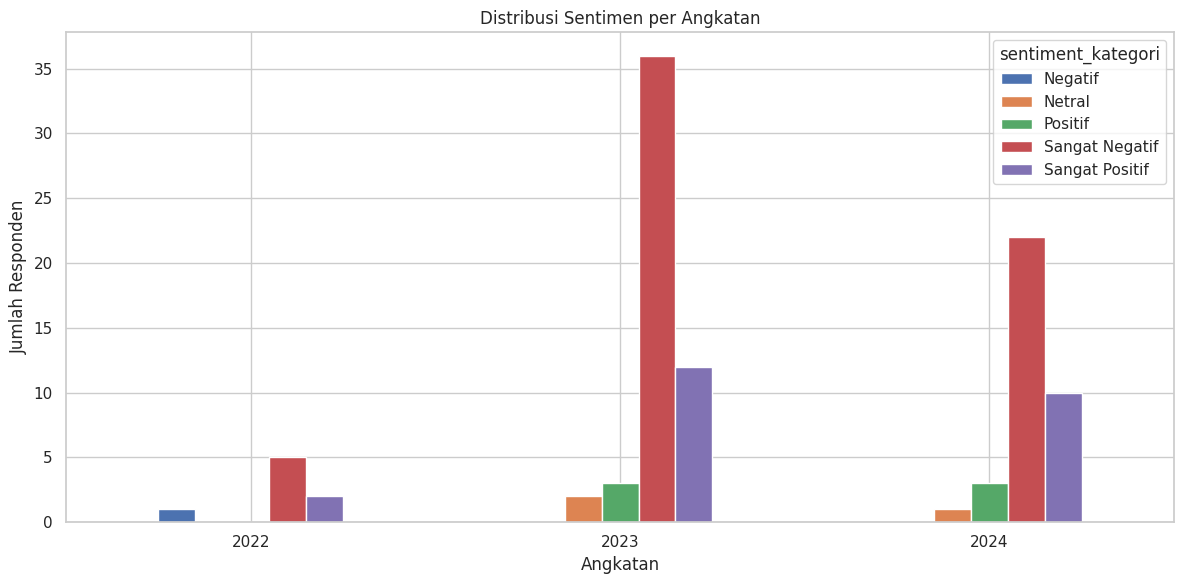

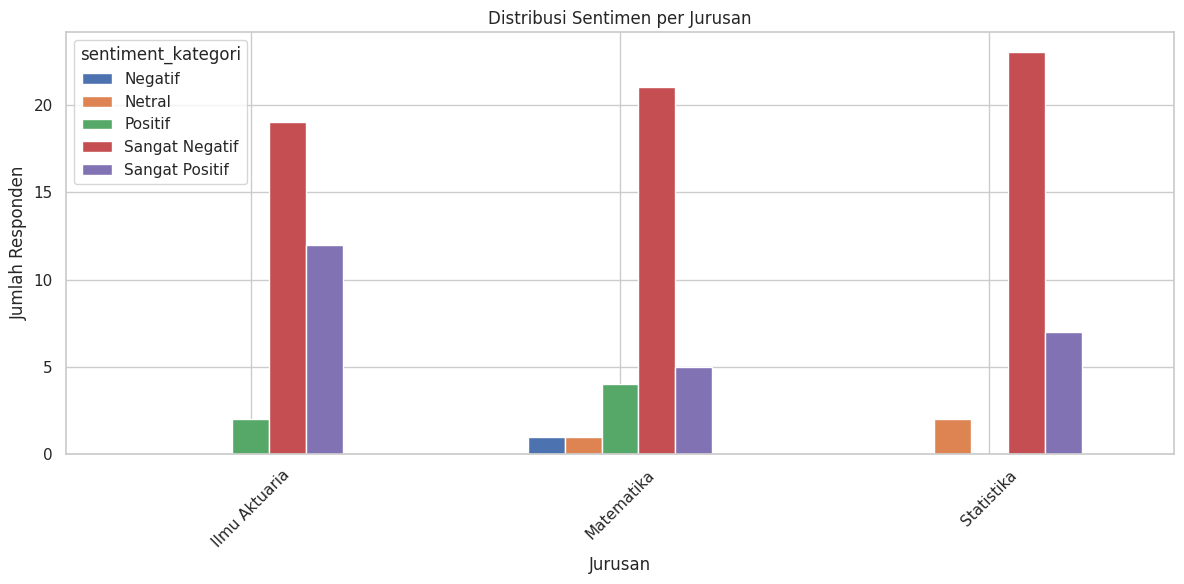

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur style visualisasi agar lebih menarik
sns.set_theme(style="whitegrid")
# 1. Muat dataset Anda
# Ganti 'cluster_sentiment_output.csv' dengan nama file Anda yang sebenarnya.
# Anggaplah file ini SEKARANG memiliki kolom 'angkatan' dan 'jurusan'.
try:
    df = df


    print("Dataset berhasil dimuat. Berikut 5 baris pertama:")
    print(df.head())
    print("\\n" + "="*50 + "\\n")

    # 2. Analisis Distribusi Sentimen per Angkatan
    print("Distribusi Sentimen per Angkatan:")
    distribusi_angkatan = pd.crosstab(df['Angkatan'], df['sentiment_kategori'])
    print(distribusi_angkatan)
    print("\\n" + "="*50 + "\\n")


    # 3. Analisis Distribusi Sentimen per Jurusan
    print("Distribusi Sentimen per Jurusan:")
    distribusi_jurusan = pd.crosstab(df['Program Studi'], df['sentiment_kategori'])
    print(distribusi_jurusan)
    print("\\n" + "="*50 + "\\n")


    # 4. (Opsional) Visualisasi hasil untuk pemahaman yang lebih baik
    # Visualisasi untuk Angkatan
    distribusi_angkatan.plot(kind='bar', figsize=(12, 6), stacked=False)
    plt.title('Distribusi Sentimen per Angkatan')
    plt.ylabel('Jumlah Responden')
    plt.xlabel('Angkatan')
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # Visualisasi untuk Jurusan
    distribusi_jurusan.plot(kind='bar', figsize=(12, 6), stacked=False)
    plt.title('Distribusi Sentimen per Jurusan')
    plt.ylabel('Jumlah Responden')
    plt.xlabel('Jurusan')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan nama file dan path-nya sudah benar.")

In [47]:
import pandas as pd

# Asumsi DataFrame 'df' sudah ada dari sel-sel sebelumnya.
# Pastikan df memiliki kolom 'jurusan', 'angkatan', dan 'cluster'.

# 1. Buat kolom baru yang menggabungkan jurusan dan angkatan untuk profil yang lebih mudah dibaca.
#    Kita ubah angkatan menjadi string untuk menghindari error saat penggabungan.
df['profil_mahasiswa'] = df['Program Studi'].astype(str) + ' ' + df['Angkatan'].astype(str)

# 2. Kelompokkan data berdasarkan 'cluster', lalu cari modus (nilai paling sering muncul)
#    dari kolom 'profil_mahasiswa' untuk setiap cluster.
#    Kita menggunakan .mode().iloc[0] untuk mengambil nilai modus pertama jika ada lebih dari satu.
profil_cluster = df.groupby('cluster')['profil_mahasiswa'].agg(lambda x: x.mode().iloc[0]).reset_index()

# 3. Ganti nama kolom agar lebih deskriptif
profil_cluster.rename(columns={'profil_mahasiswa': 'profil_dominan'}, inplace=True)

# 4. Tampilkan hasilnya
print("Profil Dominan (Jurusan & Angkatan) untuk Setiap Cluster:")
print(profil_cluster)

# Tampilkan juga rinciannya agar lebih jelas
print("\n" + "="*50 + "\n")
print("Rincian jumlah profil di setiap cluster:")
print(df.groupby(['cluster', 'profil_mahasiswa']).size().reset_index(name='jumlah'))

Profil Dominan (Jurusan & Angkatan) untuk Setiap Cluster:
   cluster      profil_dominan
0        0     Statistika 2023
1        1  Ilmu Aktuaria 2023
2        2     Matematika 2023


Rincian jumlah profil di setiap cluster:
    cluster    profil_mahasiswa  jumlah
0         0  Ilmu Aktuaria 2023       4
1         0  Ilmu Aktuaria 2024       5
2         0     Matematika 2022       1
3         0     Matematika 2023       2
4         0     Matematika 2024       3
5         0     Statistika 2022       1
6         0     Statistika 2023       7
7         0     Statistika 2024       2
8         1  Ilmu Aktuaria 2023       9
9         1  Ilmu Aktuaria 2024       5
10        1     Matematika 2022       3
11        1     Matematika 2023       7
12        1     Matematika 2024       2
13        1     Statistika 2022       1
14        1     Statistika 2023       6
15        1     Statistika 2024       4
16        2  Ilmu Aktuaria 2023       3
17        2  Ilmu Aktuaria 2024       7
18        2    

In [48]:

# 1. Buat kolom profil baru menggunakan kolom 'Program Studi' dan 'Angkatan'.
df['profil_mahasiswa'] = df['Program Studi'].astype(str) + ' ' + df['Angkatan'].astype(str)

# 2. Kelompokkan berdasarkan 'cluster' dan cari profil yang paling dominan.
profil_cluster = df.groupby('cluster')['profil_mahasiswa'].agg(lambda x: x.mode().iloc[0]).reset_index()

# 3. Ganti nama kolom agar lebih deskriptif
profil_cluster.rename(columns={'profil_mahasiswa': 'profil_dominan'}, inplace=True)

# 4. Tampilkan hasilnya
print("✅ Profil Dominan (Program Studi & Angkatan) untuk Setiap Cluster:")
print(profil_cluster)

✅ Profil Dominan (Program Studi & Angkatan) untuk Setiap Cluster:
   cluster      profil_dominan
0        0     Statistika 2023
1        1  Ilmu Aktuaria 2023
2        2     Matematika 2023


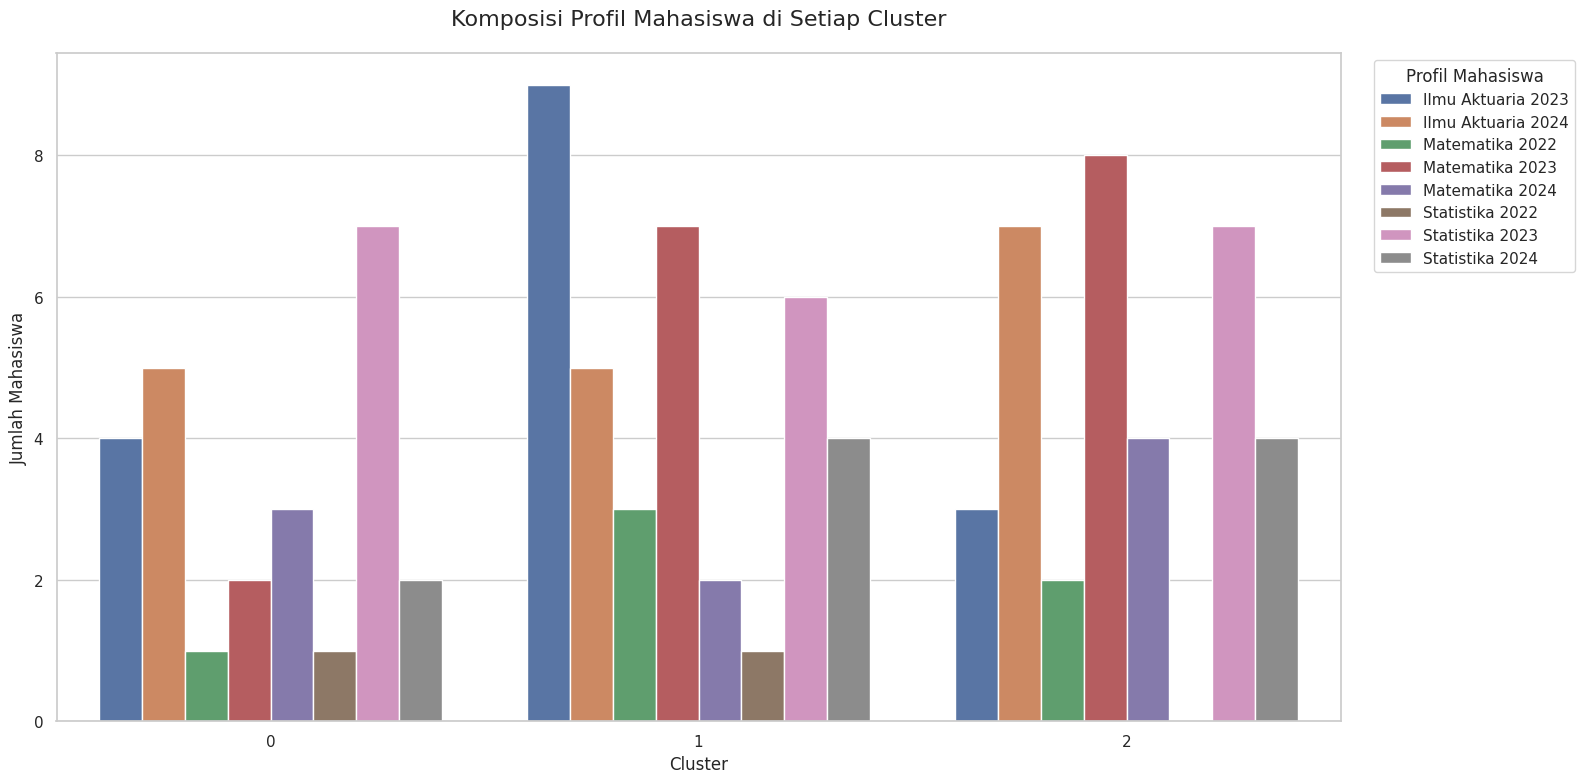

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mengatur style visualisasi agar lebih menarik
sns.set_theme(style="whitegrid")

# 1. Menghitung jumlah untuk setiap profil di dalam setiap cluster
#    (Langkah ini memastikan data sudah siap untuk divisualisasikan)
rincian_profil = df.groupby(['cluster', 'profil_mahasiswa']).size().reset_index(name='jumlah')

# 2. Membuat visualisasi menggunakan seaborn
#    Kita atur ukuran gambar agar lebih besar dan mudah dibaca
plt.figure(figsize=(16, 8))

# Membuat bar plot
# x='cluster': Sumbu X adalah cluster
# y='jumlah': Sumbu Y adalah jumlah mahasiswa
# hue='profil_mahasiswa': Setiap profil akan memiliki warna bar yang berbeda
sns.barplot(data=rincian_profil, x='cluster', y='jumlah', hue='profil_mahasiswa')

# 3. Memberi judul dan label agar grafik informatif
plt.title('Komposisi Profil Mahasiswa di Setiap Cluster', fontsize=16, pad=20)
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Jumlah Mahasiswa', fontsize=12)

# 4. Mengatur legenda agar tidak menutupi grafik
#    bbox_to_anchor memindahkan kotak legenda ke luar area plot
plt.legend(title='Profil Mahasiswa', bbox_to_anchor=(1.02, 1), loc='upper left')

# Memastikan semua label pas dan tidak terpotong
plt.tight_layout()

# Menampilkan grafik
plt.show()